<div style="text-align:center">
  <h1>Spatial Economics</h1>
  <h1>Assignment 1</h1>
  <h3>Nicolas (adjust)</h3>
  <h3>703308</h3>
  <h3>TI</h3>
</div>

This file gives explanations to the results additional to the code for replicability.

<div style="text-align:center">
  <h4>Introduction</h4>
</div>

Small intro regarding project

In [4]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

<div style="text-align:center">
  <h4>Exercise 1</h4>
</div>
Solve the model for the parametrization of the model that is assigned to your group. Describe
the equilibrium or equilibria graphically as well as in words, paying explicit attention to the
stability of the equilibria. Consider the effect of varying transport costs by constructing and
describing a graph similar to Figure 4.2 in the book (the so-called wiggle diagram). Describe
the comparative statics characteristics of the model with respect to transport costs in your own
words. Make sure that you vary the transport costs in such a way that all interesting type of
equilibria are found and can be described. 

In [ ]:
def solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam,T):
    def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return(Y1-phi1*(1-gam)*L-lam*gam*L*W1,
                Y2-(1-phi1)*(1-gam)*L-(1-lam)*gam*L*W2,
                W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
                W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
                I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
                I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))

    Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1),xtol=1e-10)
    Rel = (W1/I1**delta)/(W2/I2**delta)
    Welf = Y1/(I1**delta)+Y2/(I2**delta)
    Man_H=W1/I1**delta
    Man_F=W2/I2**delta
    Farm_H=1/I1**delta
    Farm_F=1/I2**delta
    return Rel, Welf, Man_H, Man_F, Farm_H, Farm_F

def run_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, indx, T):
    print ("T is equal to", T)
    lamda = []
    Relative = []
    Welfare = []
    W_Man_H = []
    W_Man_F = []
    W_Farm_H = [] 
    W_FRamF = []

    VRelative = np.zeros(len(lam_values))
    VWelfare = np.zeros(len(lam_values))
    VW_Man_H = np.zeros(len(lam_values))
    VW_Man_F = np.zeros(len(lam_values))
    VW_Farm_H = np.zeros(len(lam_values))
    VW_FRamF = np.zeros(len(lam_values))

    for lamh in range (len(lam_values)):
        #given specific lambda value the values are calculated and stored
        VRelative[lamh], VWelfare[lamh], VW_Man_H[lamh], VW_Man_F[lamh], VW_Farm_H[lamh], VW_FRamF[lamh] = solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam_values[lamh],T)
        Rel, Welf, Man_H, Man_F, Farm_H, Farm_F = solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam_values[lamh],T)

        lamda.append(lam_values[lamh])
        Welfare.append(Welf)
        Relative.append(Rel)
        W_Man_H.append(Man_H)
        W_Man_F.append(Man_F)
        W_Farm_H.append(Farm_H)
        W_FRamF.append(Farm_F)
    return lamda, Welfare, Relative, W_Man_H, W_Man_F, W_Farm_H, W_FRamF, T


def CP_model(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L, lines, color):
    indx = -1
    fig = plt.figure()
    for Th in range (len(Th_values)):
        indx += 1
        lamda, Welfare, Relative, W_Man_H, W_Man_F, W_Farm_H, W_FRamF, T = run_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, indx, Th_values[Th])
        
        ax = fig.add_subplot(2,3,1)
        if indx == 0:
            ax.plot(lamda,Relative,lines[indx],marker="o",color=color[indx],markersize=1,label=T)
        elif indx == 24: #round((Th_max-Th_min-1)/(Th_step)):
            ax.plot(lamda,Relative,lines[4],marker="o",color=color[4],markersize=1,label=T)
        elif indx == 50: #round((Th_max-Th_min-1)/(2*Th_step)-0.5,0):
            ax.plot(lamda,Relative,lines[2],marker="o",color=color[2],markersize=1,label=T)
        else:
            ax.plot(lamda,Relative,lines[5],marker="o",color=color[5],markersize=0.1)
        plt.plot([0, 1], [1, 1], 'k-',lw=0.5,color="Black")
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Relative real wage')
    plt.xlabel('Lambda')
    plt.title('Wiggle diagram')
    plt.show()
    

In [35]:
#Group 2: Τ = 1.9. 

phi1=0.48
# phi2=0.6
gam=0.3
L=2.0
eps=5.0
rho=0.75        #changed for gr2
bet=0.8
alp=0.08
delta=0.35      #changed for gr2
T_lambda = []
T_T = []
T_Stab=[]
fig = plt.figure()
lines = ["-","--","-.",":","+","."]
color = ["Black","Green","Red","Yellow","Purple","Grey"]
colstab = ["Red","Black"]
file = open("Results.txt","w")

# Define number of iterations T and lambda
Th_min=150
Th_max=201 
Th_step=1
Th_div=100

lamh_min=1
lamh_max=99
lamh_step=1
lamh_div=100
print(round((Th_max-Th_min-1)/(2*Th_step)-0.5,0))
print(round((Th_max-Th_min-1)/(Th_step)))

Th_values = np.arange(Th_min, Th_max, Th_step) / Th_div
lam_values = np.arange(lamh_min, lamh_max, lamh_step) / lamh_div
#CP_model(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L, lines, color)

24.0
50


<Figure size 640x480 with 0 Axes>

In [11]:
lines

['-', '--', '-.', ':', '+', '.']

C:\Users\yanni\AppData\Local\Temp\ipykernel_4284\2949829921.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(lamda,Relative,lines[5],marker="o",color=color[5],markersize=0.1)
C:\Users\yanni\AppData\Local\Temp\ipykernel_4284\2949829921.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [1, 1], 'k-',lw=0.5,color="Black")
C:\Users\yanni\AppData\Local\Temp\ipykernel_4284\2949829921.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax2.plot(lamda,Welfare,lines[5],marker="o",color=color[5],markersize=0.01)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored wh

50
24.0


C:\Users\yanni\AppData\Local\Temp\ipykernel_4284\2949829921.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax3.plot(lamda,W_Man_H,lines[5],marker="o",color=color[5],markersize=0.1)


Text(0.5, 1.0, 'Wage manufacturing workers home')

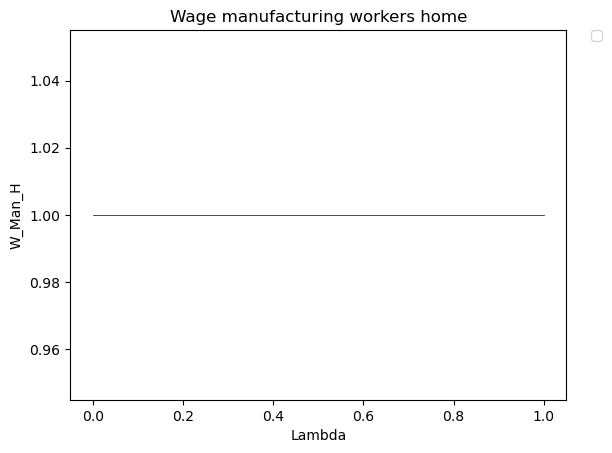

In [ ]:




ax2 = fig.add_subplot(2,3,3)
if indx ==0:
    ax2.plot(lamda,Welfare,lines[indx],marker="o",color=color[indx],markersize=1,label=T)
elif indx == round((Th_max-Th_min-1)/(Th_step)):
    ax2.plot(lamda,Welfare,lines[4],marker="o",color=color[4],markersize=1,label=T)
elif indx == round((Th_max-Th_min-1)/(2*Th_step),0):
    ax2.plot(lamda,Welfare,lines[2],marker="o",color=color[2],markersize=1,label=T)
else:
    ax2.plot(lamda,Welfare,lines[5],marker="o",color=color[5],markersize=0.01)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Welfare')
plt.xlabel('Lambda')
plt.title('Welfare')

ax3 = fig.add_subplot(2,3,2)
if indx ==0:
    ax3.plot(lamda,W_Man_H,lines[indx],marker="o",color=color[indx],markersize=1,label=T)
elif indx == round((Th_max-Th_min-1)/(Th_step)):
    ax3.plot(lamda,W_Man_H,lines[4],marker="o",color=color[4],markersize=1,label=T)
elif indx == round((Th_max-Th_min-1)/(2*Th_step),0):
    ax3.plot(lamda,W_Man_H,lines[2],marker="o",color=color[2],markersize=1,label=T)
else:
    ax3.plot(lamda,W_Man_H,lines[5],marker="o",color=color[5],markersize=0.1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('W_Man_H')
plt.xlabel('Lambda')
plt.title('Wage manufacturing workers home')